In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

In [75]:
def molekularna_veriznica(num_iter: int, kBT: float, alpha: float, hlim: int = -18, bounds: tuple = (0,0), num_el: int = 17):

    configurations = np.zeros((num_iter, 17))
    configurations[0] = np.append(np.append(bounds[0], np.random.randint(-10, 0., num_el-2, dtype=int)), bounds[1])
    Es = np.zeros(num_iter)
    Es[0] = np.sum(alpha*configurations[0]) + 1/2 * np.sum(((configurations[0]-np.roll(configurations[0], -1, axis=0))[:-1])**2)
    num_accepted = 0.

    for i in range(1, num_iter):
        E_old = Es[i-1]
        old_configuration = configurations[i-1]

        k = np.random.randint(1, num_el-1) # k-tega spremenimo
        possible_new_configuration = old_configuration.copy()
        possible_new_configuration[k] += np.random.choice([-1, 1]) # k-tega spremenimo za + ali - 1
        possible_new_configuration[k] = max(possible_new_configuration[k], hlim) # Nesme biti manj kot hlim
        possible_E_new = np.sum(alpha*possible_new_configuration) + 1/2 * np.sum(((possible_new_configuration-np.roll(possible_new_configuration, -1, axis=0))[:-1])**2)

        if possible_E_new < E_old:
            configurations[i] = possible_new_configuration
            Es[i] = possible_E_new
            num_accepted += 1
        
        else:
            ksi = np.random.rand()
            if ksi < np.exp(-(possible_E_new-E_old)/kBT):
                configurations[i] = possible_new_configuration
                Es[i] = possible_E_new
                num_accepted += 1
            else:
                configurations[i] = old_configuration
                Es[i] = E_old
    
    return configurations, Es, num_accepted/num_iter

### Primer kako se konfiguracija spreminja s koraki za nekaj izbranih $\alpha$ in $k_BT$.

In [56]:
num_el = 17
num_iter = 1000
alphas = [0.1, 1., 10.]
kBTs = [0.1, 1., 10.]
steps = np.arange(0, num_iter)
elements = np.arange(0, num_el)

In [57]:
configurations00, Es00, accepted_ratio00 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[0])
configurations01, Es01, accepted_ratio01 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[1])
configurations02, Es02, accepted_ratio02 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[2])
configurations10, Es10, accepted_ratio10 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[0])
configurations11, Es11, accepted_ratio11 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[1])
configurations12, Es12, accepted_ratio12 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[2])
configurations20, Es20, accepted_ratio20 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[0])
configurations21, Es21, accepted_ratio21 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[1])
configurations22, Es22, accepted_ratio22 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[2])

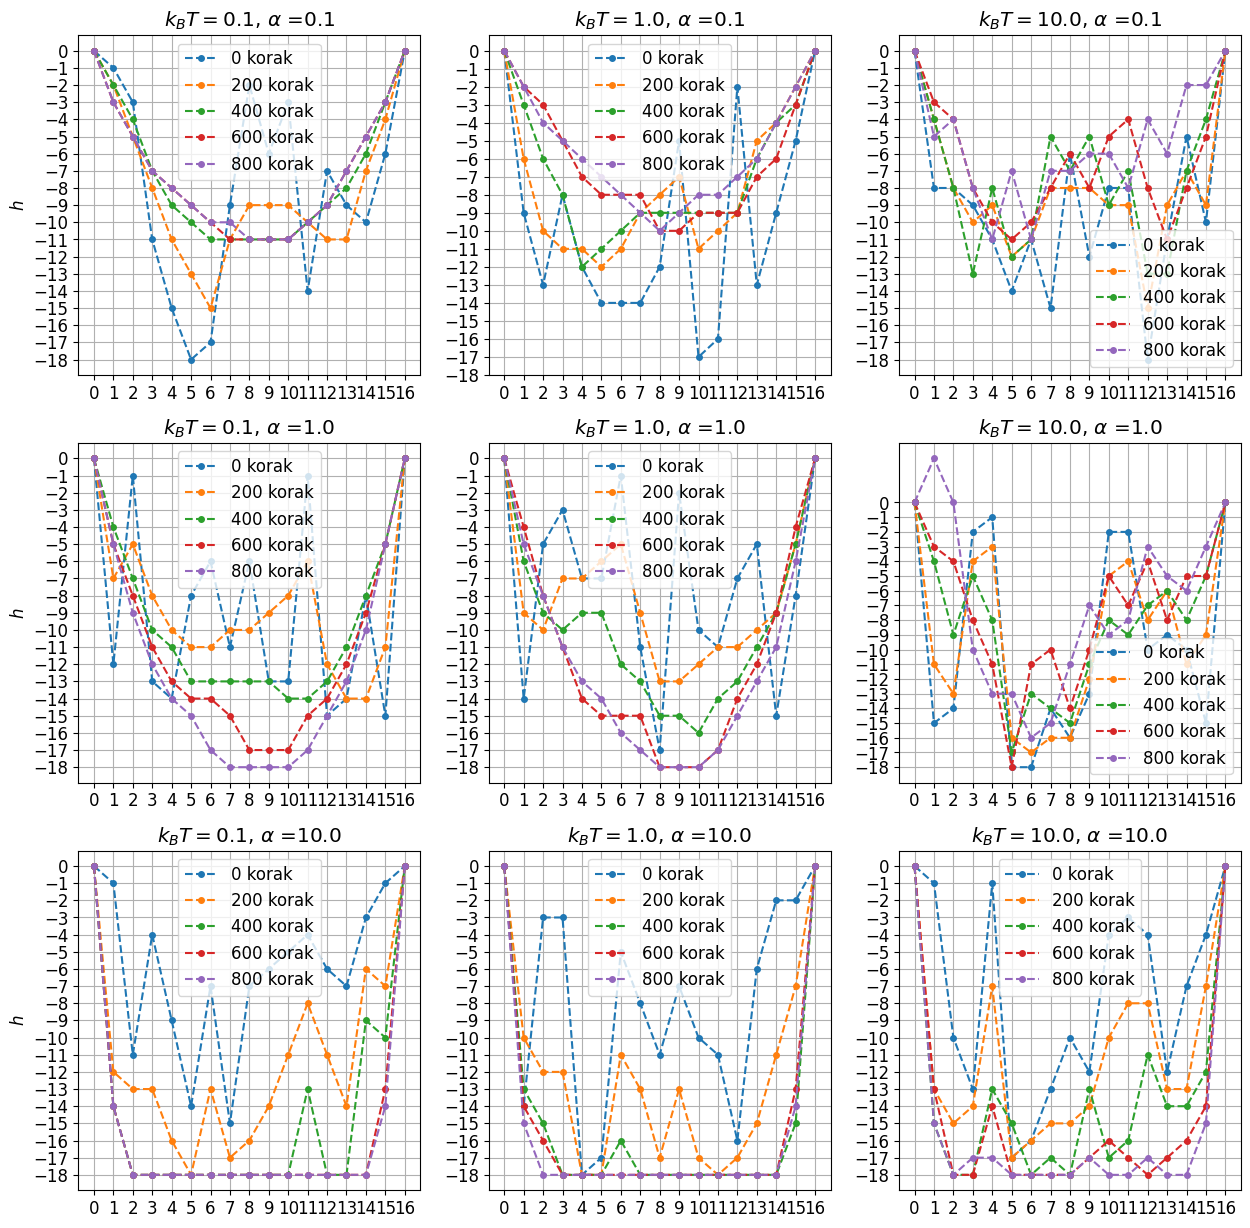

In [58]:
fig = plt.figure(figsize=(15, 15))
n = 5

ax00 = fig.add_subplot(3, 3, 1)
ax00.set_title(r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha$ =' + f'{alphas[0]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax00.plot(elements, configurations00[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax00.set_yticks(np.arange(-18, 1))
ax00.set_xticks(np.arange(0, 17))
ax00.set_ylabel(r'$h$')
ax00.grid()
ax00.legend()

ax01 = fig.add_subplot(3, 3, 2)
ax01.set_title(r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha$ =' + f'{alphas[0]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax01.plot(elements, configurations01[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax01.set_yticks(np.arange(-18, 1))
ax01.set_xticks(np.arange(0, 17))
ax01.grid()
ax01.legend()

ax02 = fig.add_subplot(3, 3, 3)
ax02.set_title(r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha$ =' + f'{alphas[0]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax02.plot(elements, configurations02[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax02.set_yticks(np.arange(-18, 1))
ax02.set_xticks(np.arange(0, 17))
ax02.grid()
ax02.legend()

ax10 = fig.add_subplot(3, 3, 4)
ax10.set_title(r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha$ =' + f'{alphas[1]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax10.plot(elements, configurations10[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax10.set_yticks(np.arange(-18, 1))
ax10.set_xticks(np.arange(0, 17))
ax10.set_ylabel(r'$h$')
ax10.grid()
ax10.legend()

ax11 = fig.add_subplot(3, 3, 5)
ax11.set_title(r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha$ =' + f'{alphas[1]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax11.plot(elements, configurations11[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax11.set_yticks(np.arange(-18, 1))
ax11.set_xticks(np.arange(0, 17))
ax11.grid()
ax11.legend()

ax12 = fig.add_subplot(3, 3, 6)
ax12.set_title(r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha$ =' + f'{alphas[1]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax12.plot(elements, configurations12[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax12.set_yticks(np.arange(-18, 1))
ax12.set_xticks(np.arange(0, 17))
ax12.grid()
ax12.legend()

ax20 = fig.add_subplot(3, 3, 7)
ax20.set_title(r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax20.plot(elements, configurations20[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax20.set_yticks(np.arange(-18, 1))
ax20.set_xticks(np.arange(0, 17))
ax20.set_ylabel(r'$h$')
ax20.grid()
ax20.legend()

ax21 = fig.add_subplot(3, 3, 8)
ax21.set_title(r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax21.plot(elements, configurations21[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax21.set_yticks(np.arange(-18, 1))
ax21.set_xticks(np.arange(0, 17))
ax21.grid()
ax21.legend()

ax22 = fig.add_subplot(3, 3, 9)
ax22.set_title(r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax22.plot(elements, configurations22[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax22.set_yticks(np.arange(-18, 1))
ax22.set_xticks(np.arange(0, 17))
ax22.grid()
ax22.legend()

In [59]:
avg_height00 = np.average(configurations00, axis=1)
avg_height01 = np.average(configurations01, axis=1)
avg_height02 = np.average(configurations02, axis=1)
avg_height10 = np.average(configurations10, axis=1)
avg_height11 = np.average(configurations11, axis=1)
avg_height12 = np.average(configurations12, axis=1)
avg_height20 = np.average(configurations20, axis=1)
avg_height21 = np.average(configurations21, axis=1)
avg_height22 = np.average(configurations22, axis=1)

avg_dist_squared00 = np.average(((configurations00 - np.roll(configurations00, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared01 = np.average(((configurations01 - np.roll(configurations01, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared02 = np.average(((configurations02 - np.roll(configurations02, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared10 = np.average(((configurations10 - np.roll(configurations10, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared11 = np.average(((configurations11 - np.roll(configurations11, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared12 = np.average(((configurations12 - np.roll(configurations12, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared20 = np.average(((configurations20 - np.roll(configurations20, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared21 = np.average(((configurations21 - np.roll(configurations21, -1, axis=1))[:, :-1])**2, axis=1)
avg_dist_squared22 = np.average(((configurations22 - np.roll(configurations22, -1, axis=1))[:, :-1])**2, axis=1)

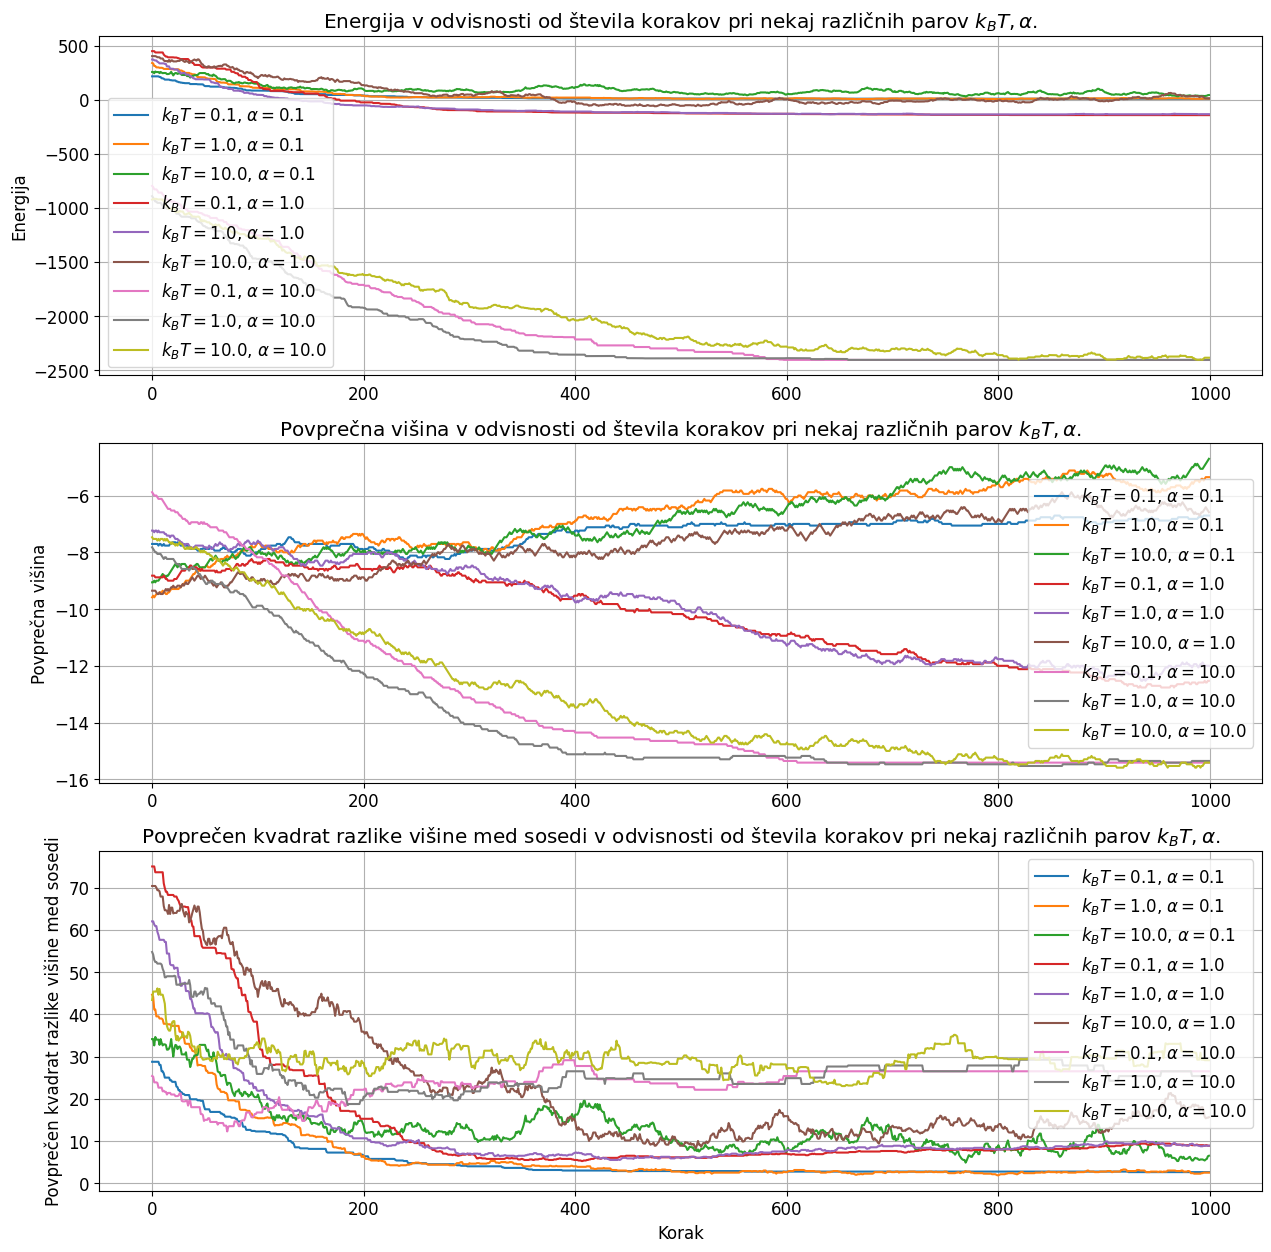

In [60]:
fig = plt.figure(figsize=(15, 15))
n = 5

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title(r'Energija v odvisnosti od števila korakov pri nekaj različnih parov $k_BT, \alpha$.')
ax0.set_ylabel('Energija')
ax0.plot(steps, Es00, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax0.plot(steps, Es01, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax0.plot(steps, Es02, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax0.plot(steps, Es10, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax0.plot(steps, Es11, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax0.plot(steps, Es12, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax0.plot(steps, Es20, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax0.plot(steps, Es21, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax0.plot(steps, Es22, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax0.grid()
ax0.legend()

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title(r'Povprečna višina v odvisnosti od števila korakov pri nekaj različnih parov $k_BT, \alpha$.')
ax1.set_ylabel('Povprečna višina')
ax1.plot(steps, avg_height00, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax1.plot(steps, avg_height01, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax1.plot(steps, avg_height02, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax1.plot(steps, avg_height10, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax1.plot(steps, avg_height11, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax1.plot(steps, avg_height12, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax1.plot(steps, avg_height20, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax1.plot(steps, avg_height21, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax1.plot(steps, avg_height22, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title(r'Povprečen kvadrat razlike višine med sosedi v odvisnosti od števila korakov pri nekaj različnih parov $k_BT, \alpha$.')
ax2.set_xlabel('Korak')
ax2.set_ylabel('Povprečen kvadrat razlike višine med sosedi')
ax2.plot(steps, avg_dist_squared00, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax2.plot(steps, avg_dist_squared01, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax2.plot(steps, avg_dist_squared02, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[0]}')
ax2.plot(steps, avg_dist_squared10, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax2.plot(steps, avg_dist_squared11, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax2.plot(steps, avg_dist_squared12, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[1]}')
ax2.plot(steps, avg_dist_squared20, label=r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax2.plot(steps, avg_dist_squared21, label=r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax2.plot(steps, avg_dist_squared22, label=r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha =$' + f'{alphas[2]}')
ax2.grid()
ax2.legend()

### Kako se v ravnovesju spreminja povprečna energija ter varianca energije v odvisnosti od parametrov $\alpha$ in $k_BT$.

In [66]:
num_el = 17
num_iter = 10000
alphas = np.append(0.1, np.arange(1, 5, 1))
kBTs = np.linspace(0.1, 10, 300)
steps = np.arange(0, num_iter)

In [67]:
print(alphas)

[0.1 1.  2.  3.  4. ]


In [68]:
energies = np.zeros((len(alphas), len(kBTs)))
sigma_energies = np.zeros((len(alphas), len(kBTs)))

average_height = np.zeros((len(alphas), len(kBTs)))
sigma_average_height = np.zeros((len(alphas), len(kBTs)))

average_distance_squared = np.zeros((len(alphas), len(kBTs)))
sigma_average_distance_squared = np.zeros((len(alphas), len(kBTs)))

In [69]:
for i, alpha in enumerate(alphas):

    print(i/len(alphas))

    for j, kBT in enumerate(kBTs):

        configurations, Es, accepted_ratio = molekularna_veriznica(num_iter=num_iter, kBT=kBT, alpha=alpha)
        configurations_eq = configurations[1000:] # Equillibrium približno po 1000 korakih recimo
        Es_eq = Es[1000:]

        energies[i][j] = np.average(Es_eq)
        sigma_energies[i][j] = np.std(Es_eq)
        
        average_height[i][j] = np.average(configurations_eq)
        sigma_average_height[i][j] = np.std(configurations_eq)

        average_distance_squared[i][j] = np.average(((configurations_eq - np.roll(configurations_eq, -1, axis=1))[:, :-1])**2)
        sigma_average_distance_squared[i][j] = np.std(((configurations_eq - np.roll(configurations_eq, -1, axis=1))[:, :-1])**2)

0.0
0.2
0.4
0.6
0.8


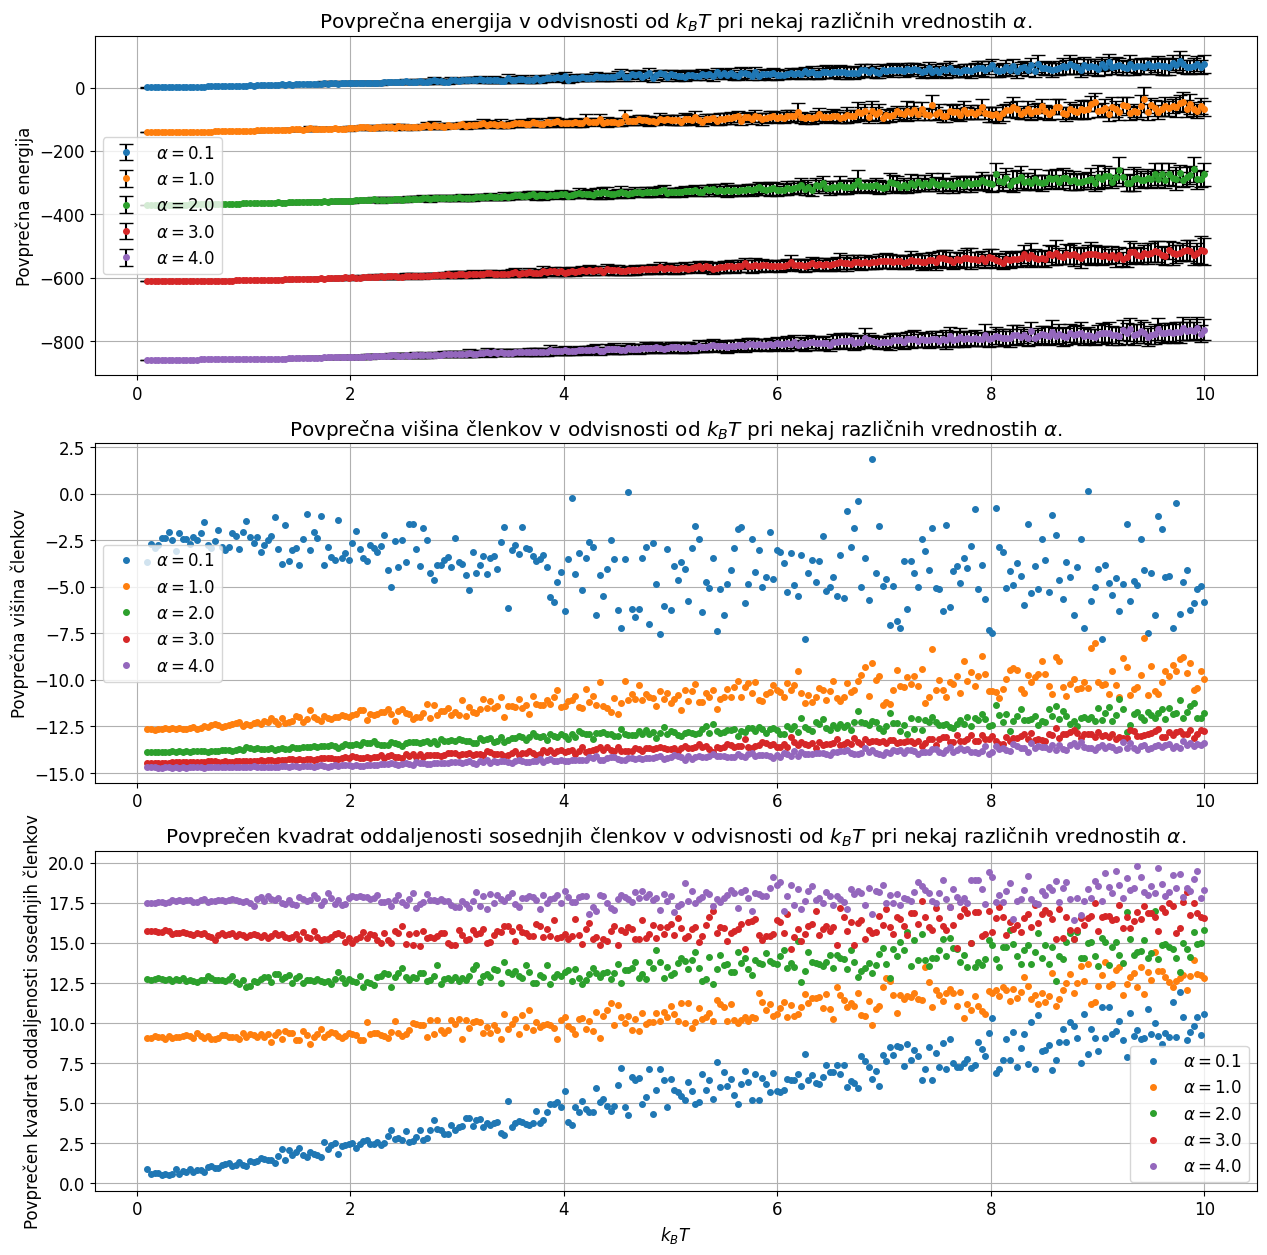

In [ ]:
fig = plt.figure(figsize=(15, 15))
n = 5

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title(r'Povprečna energija v odvisnosti od $k_BT$ pri nekaj različnih vrednostih $\alpha$.')
ax0.errorbar(kBTs, energies[0], yerr=sigma_energies[0], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[0]}')
ax0.errorbar(kBTs, energies[1], yerr=sigma_energies[1], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[1]}')
ax0.errorbar(kBTs, energies[2], yerr=sigma_energies[2], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[2]}')
ax0.errorbar(kBTs, energies[3], yerr=sigma_energies[3], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[3]}')
ax0.errorbar(kBTs, energies[4], yerr=sigma_energies[4], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[4]}')
#ax0.errorbar(kBTs, energies[5], yerr=sigma_energies[5], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[5]}')
ax0.set_ylabel('Povprečna energija')
ax0.grid()
ax0.legend()

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title(r'Povprečna višina členkov v odvisnosti od $k_BT$ pri nekaj različnih vrednostih $\alpha$.')
ax1.errorbar(kBTs, average_height[0], fmt='.', markersize=8, capsize=5, barsabove=False, label=r'$\alpha =$' + f'{alphas[0]}')
ax1.errorbar(kBTs, average_height[1], fmt='.', markersize=8, capsize=5, barsabove=False, label=r'$\alpha =$' + f'{alphas[1]}')
ax1.errorbar(kBTs, average_height[2], fmt='.', markersize=8, capsize=5, barsabove=False, label=r'$\alpha =$' + f'{alphas[2]}')
ax1.errorbar(kBTs, average_height[3], fmt='.', markersize=8, capsize=5, barsabove=False, label=r'$\alpha =$' + f'{alphas[3]}')
ax1.errorbar(kBTs, average_height[4], fmt='.', markersize=8, capsize=5, barsabove=False, label=r'$\alpha =$' + f'{alphas[4]}')
#ax1.errorbar(kBTs, average_height[5], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[5]}')
ax1.set_ylabel('Povprečna višina členkov')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title(r'Povprečen kvadrat oddaljenosti sosednjih členkov v odvisnosti od $k_BT$ pri nekaj različnih vrednostih $\alpha$.')
ax2.errorbar(kBTs, average_distance_squared[0], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[0]}')
ax2.errorbar(kBTs, average_distance_squared[1], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[1]}')
ax2.errorbar(kBTs, average_distance_squared[2], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[2]}')
ax2.errorbar(kBTs, average_distance_squared[3], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[3]}')
ax2.errorbar(kBTs, average_distance_squared[4], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[4]}')
ax2.set_ylabel('Povprečen kvadrat oddaljenosti sosednjih členkov')
ax2.set_xlabel(r'$k_BT$')
#ax2.errorbar(kBTs, average_distance_squared[5], fmt='.', markersize=8, capsize=5, barsabove=False, ecolor='black', label=r'$\alpha =$' + f'{alphas[5]}')
ax2.grid()
ax2.legend()

- brez omejitve višine

In [73]:
num_el = 17
num_iter = 50000
alphas = [0.1, 1., 10.]
kBTs = [0.1, 1., 10.]
steps = np.arange(0, num_iter)
elements = np.arange(0, num_el)
hlim = -1000000

In [76]:
configurations00, Es00, accepted_ratio00 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[0], hlim=hlim)
configurations01, Es01, accepted_ratio01 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[1], hlim=hlim)
configurations02, Es02, accepted_ratio02 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[0], kBT=kBTs[2], hlim=hlim)
configurations10, Es10, accepted_ratio10 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[0], hlim=hlim)
configurations11, Es11, accepted_ratio11 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[1], hlim=hlim)
configurations12, Es12, accepted_ratio12 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[1], kBT=kBTs[2], hlim=hlim)
configurations20, Es20, accepted_ratio20 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[0], hlim=hlim)
configurations21, Es21, accepted_ratio21 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[1], hlim=hlim)
configurations22, Es22, accepted_ratio22 = molekularna_veriznica(num_iter=num_iter, alpha=alphas[2], kBT=kBTs[2], hlim=hlim)

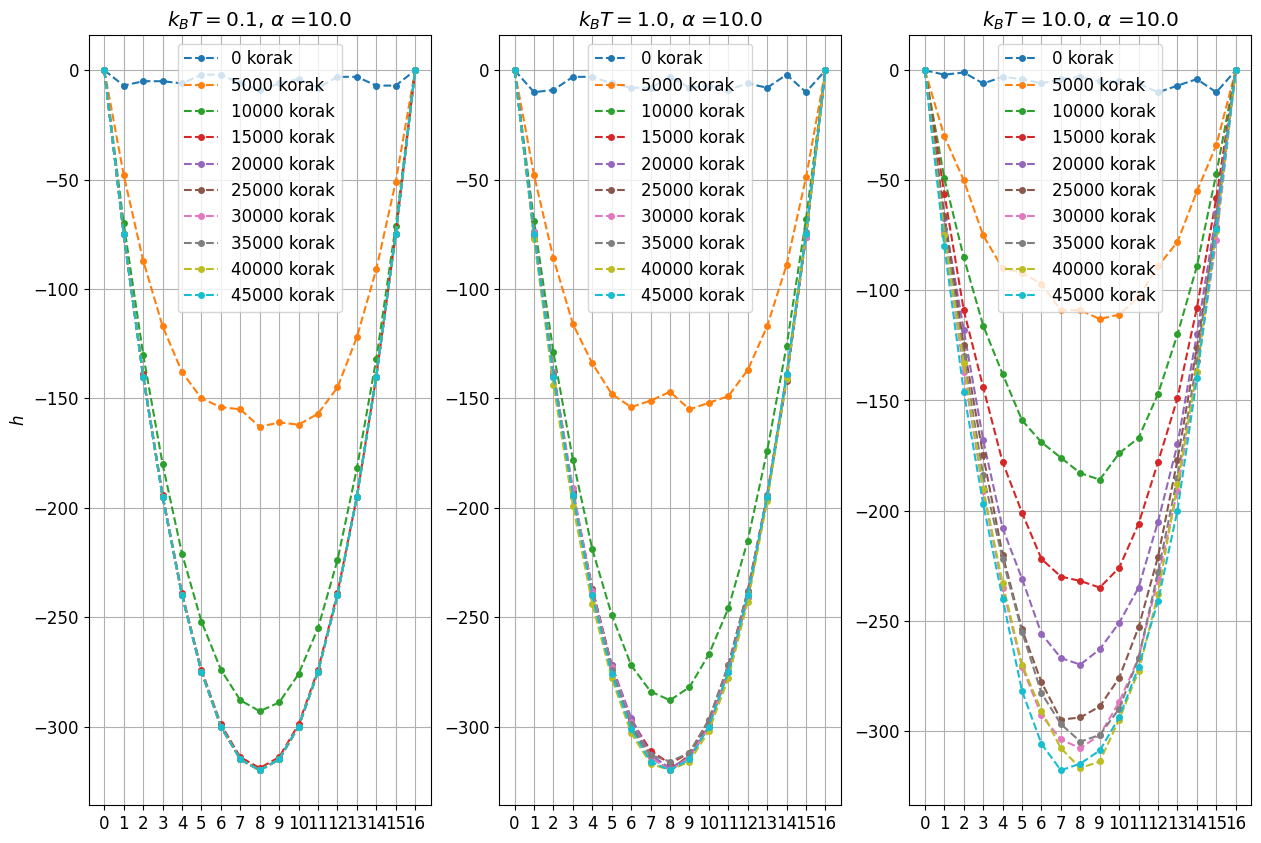

In [77]:
fig = plt.figure(figsize=(15, 10))
n = 10

ax20 = fig.add_subplot(1, 3, 1)
ax20.set_title(r'$k_BT =$' + f'{kBTs[0]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax20.plot(elements, configurations20[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax20.set_xticks(np.arange(0, 17))
ax20.set_ylabel(r'$h$')
ax20.grid()
ax20.legend()

ax21 = fig.add_subplot(1, 3, 2)
ax21.set_title(r'$k_BT =$' + f'{kBTs[1]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax21.plot(elements, configurations21[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax21.set_xticks(np.arange(0, 17))
ax21.grid()
ax21.legend()

ax22 = fig.add_subplot(1, 3, 3)
ax22.set_title(r'$k_BT =$' + f'{kBTs[2]}, ' + r'$\alpha$ =' + f'{alphas[2]}')
for i in range(0, n):
    step = int((num_iter/n)*i)
    ax22.plot(elements, configurations22[step], marker='.', markersize=8, linestyle='--', label=f'{step} korak')
ax22.set_xticks(np.arange(0, 17))
ax22.grid()
ax22.legend()